# 1.4_Supervised Learning: Part 1

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. KNN Model & Confusion Matrix
   - Reduce to Relevant Temp Data
   - Create X & Y Variables & Train/Test Sets
   - Run KNN Model
   - Plot Relationship
   - Plot Confusion Matrixes for 15 Locations

## 1. Install Libraries

## 2. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

## 3. Import Datasets

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [9]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [10]:
#Read in the European scaled weather data.
climate = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'weather_scaled.parquet'))
climate.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-

In [11]:
climate.shape

(22950, 170)

In [12]:
#Read in "pleasant weather" answers data
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col=False)
pleasant.head(3)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
pleasant.shape

(22950, 16)

## 4. KNN Model & Confusion Matrix

### Reduce to Relevant Temp Data

In [16]:
#Reduce to just the mean temperatures (minus Roma, Tours, & Gdansk)
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()
df.head(1)

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.98828,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215


### Create X & Y Variables & Train/Test Sets

In [18]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [19]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [20]:
### Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


### Run KNN Model

In [36]:
for i, k in enumerate(k_range):
    print(f"For k = {k}:")
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Generate predictions for both train and test sets
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    
    # Store predictions
    y_pred_test_list.append(y_pred_test)
    y_pred_train_list.append(y_pred_train)
    
    # Calculate and store accuracies
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))
    
    print(f"  Training Accuracy: {train_acc[i]:.4f}")
    print(f"  Testing Accuracy: {test_acc[i]:.4f}")
    print()

# Print the best model's performance
best_k_index = np.argmax(test_acc)
best_k = k_range[best_k_index]
print(f"Best model (k={best_k}):")
print(f"  Best Training Accuracy: {train_acc[best_k_index]:.4f}")
print(f"  Best Testing Accuracy: {test_acc[best_k_index]:.4f}")



For k = 1:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.4089

For k = 2:
  Training Accuracy: 0.5370
  Testing Accuracy: 0.4230

For k = 3:
  Training Accuracy: 0.5270
  Testing Accuracy: 0.4258

Best model (k=3):
  Best Training Accuracy: 0.5270
  Best Testing Accuracy: 0.4258


### Plot Relationship

<function matplotlib.pyplot.show(close=None, block=None)>

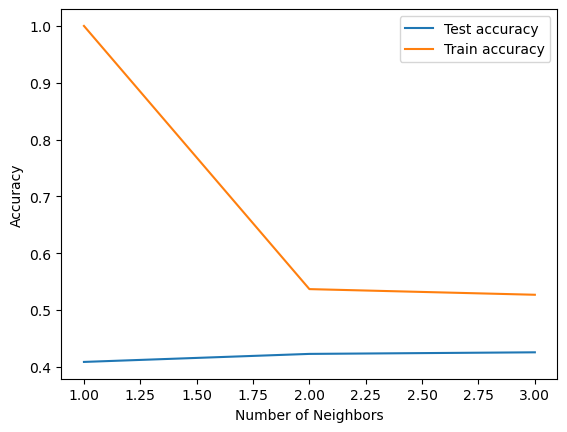

In [25]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### Plot Confusion Matrix for 15 Locations

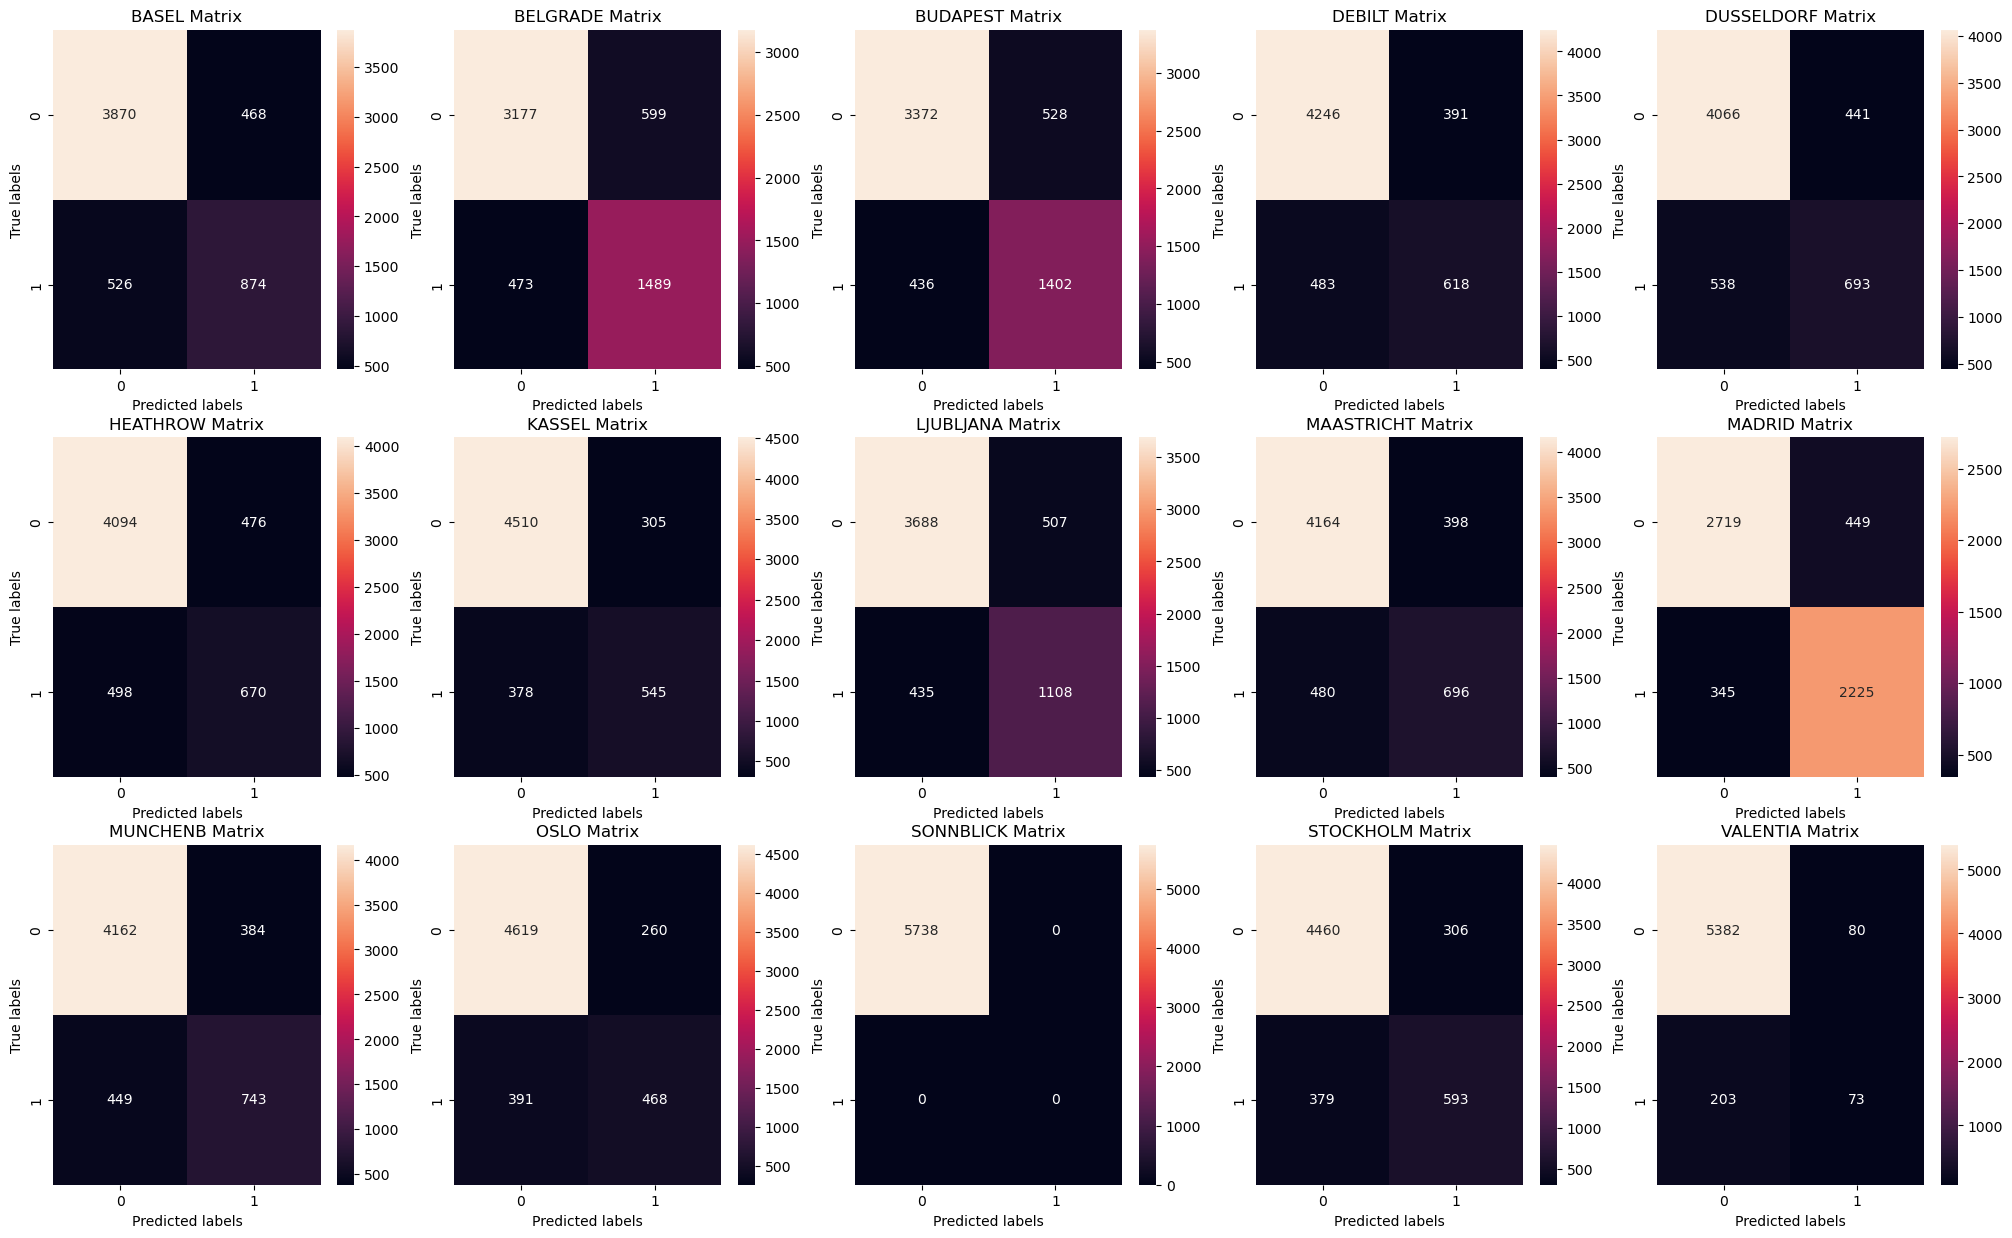

In [27]:
#Plot out multi-confusion matrix for test data

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

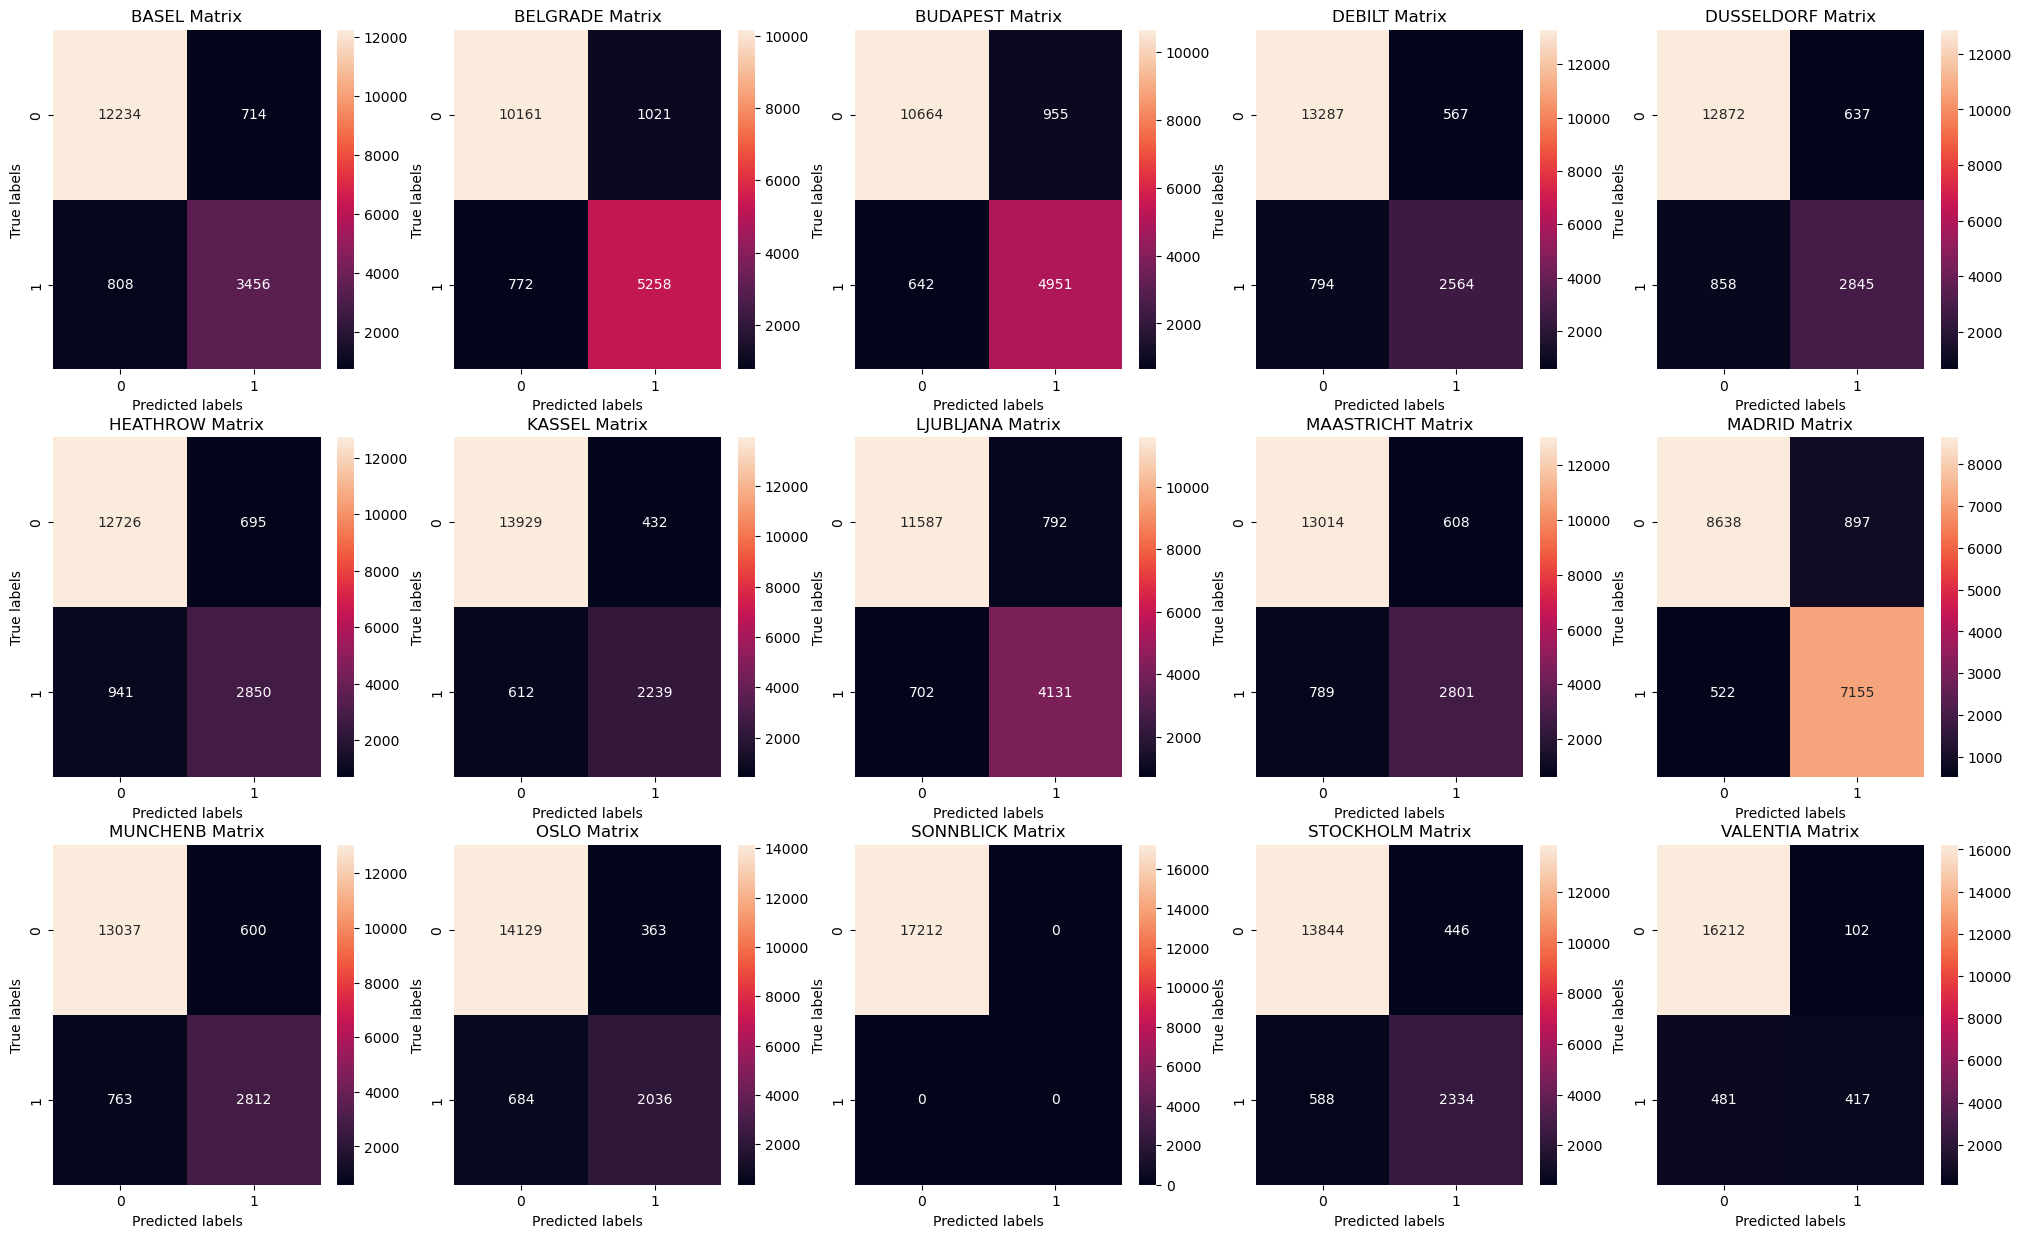

In [28]:
#Plot out multi-confusion matrix for train data

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [30]:
from sklearn.metrics import classification_report

# For the training data
print('Train Classification Report:')
report_train = classification_report(y_train, y_pred_train)
print(report_train)

# For the test data
print('\nTest Classification Report:')
report_test = classification_report(y_test, y_pred_test)
print(report_test)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4264
           1       0.84      0.87      0.85      6030
           2       0.84      0.89      0.86      5593
           3       0.82      0.76      0.79      3358
           4       0.82      0.77      0.79      3703
           5       0.80      0.75      0.78      3791
           6       0.84      0.79      0.81      2851
           7       0.84      0.85      0.85      4833
           8       0.82      0.78      0.80      3590
           9       0.89      0.93      0.91      7677
          10       0.82      0.79      0.80      3575
          11       0.85      0.75      0.80      2720
          12       0.00      0.00      0.00         0
          13       0.84      0.80      0.82      2922
          14       0.80      0.46      0.59       898

   micro avg       0.84      0.82      0.83     55805
   macro avg       0.78      0.73      0.75     558

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac